### ME314 Introduction to Data Science and Big Data Analytics

# The Shape of Data

### Day 2 Lecture, 31 July 2018 - Kenneth Benoit

# Plan today

* The nature of data
* Units of data
* Data types
* More about `git`
* Representing text data: Unicode
* Representing dates
* Representing sparse matrix formats
* Data and datasets
    * "tidy" data
    * reshaping data
    * normalization forms
* Lab preview

## Data is Fundamental


> _"You can have data without information, but you cannot have information without data."_ – Daniel Keys Moran, an American computer programmer and science fiction writer.



> _"In God we trust. All others must bring data."_ – W. Edwards Deming, statistician, professor, author, lecturer, and consultant.

# Structured data: Index cards

* Origins in the 19th century, with botanist [Carl Linnaeus](https://en.wikipedia.org/wiki/Carl_Linnaeus), who needed to record species that he was studying

* This was a form of _database_
    - each piece of information about a species formed a _field_
    - each species' entry in the system formed a _record_
    - the records were _indexed_ using some reference system

### Heyday: Use in libraries to catalog books

![card catalog](figs/cardcatalog.jpg "Card catalog") ![card catalog room](figs/cardcatalog3.jpg "Card catalog room")
    

### a record looked like this

![card record](figs/cardcatalog2.jpg "Card record")

## Dewey decimal system

* a proprietary library classification system first published in the United States by Melvil Dewey in 1876
* scheme is made up of ten classes, each divided into ten divisions, each having ten sections
* the system's notation uses Arabic numbers, with three whole numbers making up the main classes and sub-classes and decimals creating further divisions


* Example:

    ```
    500 Natural sciences and mathematics
        510 Mathematics
            516 Geometry
                516.3 Analytic geometries
                    516.37 Metric differential geometries
                        516.375 Finsler Geometry
    ```

# How to index?

* Problem: Could only sort the cards one way
* Re-referencing was literally a manual operation

* Contrast with the idea of electronic indexes, where assets are stored once, and many indexing and reference systems can be applied
    ![photos](figs/photos.png "Apple Photos")
* In most photographic software, edits are "non-destructive", and stored separately from the original images

## Modern database manager

* "Normalizes" data into relational tables, linked by "keys" (more on this in [Week 3](https://lse-st445.github.io/#week-3-creating-and-managing-databases))

    ![relational data](figs/relational_data.png "Relational data")


## Punch cards (and legacy systems)

* How we used to enter programs into the computer
   ![punch card](figs/punchard.jpg "Punchcard")
* Pre-computer origins: 18-th century use in textile looms
* Responsible for the 80-character legacy


### Who knows what this is?

![piano roll](figs/pianoroll2.jpg "Piano roll")

That is a [piano roll](https://en.wikipedia.org/wiki/Piano_roll), where music to be played by a [player piano](https://en.wikipedia.org/wiki/Player_piano) is encoded.

# The point: Information is more than data

### Data

* raw, unorganized facts that need to be processed
* unusable until it is organized

### Information

* created when data is processed, organized, structured
* needs to be situated in an appropriate _context_ in order to become useful

### There are important differences in how humans and computers treat data as information



# Changes in the world of data

* volume of data in the modern world: 90% of the world's data [generated in the last _two years_](https://www.sciencedaily.com/releases/2013/05/130522085217.htm)


* and that was _in 2013_

* SKA: Square Kilometer Array
    - a southern hemisphere radio telescope with a total of 1 km$^2$ of data sensors
    - will generate 1 exabyte _daily_ = $1 \times 10^{18}$ bytes
    - = 1,000,000,000,000,000,000 bytes

* compare this with the Apollo Guidance Computer (1966), which guided the first humans to the moon
    - 16-bit wordlength, 2048 words RAM (magnetic core memory) = _4KB_
    - 36,864 words ROM (core rope memory) = _73KB_
    ![](figs/agc.jpg)


# Basic units of data

* Bits
   - smallest unit of storage, a 0 or 1
   - anything that can store two states - now "transistors", used to be vacuum tubes
   - with $n$ bits, can store $2^n$ patterns - so one byte can store 256 patterns


* Bytes
   - eight _bits_ = one _byte_
   - "eight bit encoding" - represented characters, such as `A` represented as 65
   
  ![ASCII](figs/ASCII.png)

### multi-byte units

| unit     | abbreviation | total bytes  | nearest decimal equivalent |
|:--------:|:------------:|-------------:|---------------------------:|
| kilobyte |     KB       | 1,024^1      |             1000^1         |
| megabyte |     MB       | 1,024^2      |             1000^2         |
| gigabyte |     GB       | 1,024^3      |             1000^3         |
| terabyte |     TB       | 1,024^4      |             1000^4         |
| petabyte |     PB       | 1,024^5      |             1000^5         |
| exabyte  |     EB       | 1,024^6      |             1000^6         |
| zettabyte|     ZB       | 1,024^7      |             1000^7         |
| yottabyte|     YB       | 1,024^8      |             1000^8         |

* this is why 1GB is greater than 1 billion bytes

![decimal v. binary](figs/decimalvbinary.png)

# Data types: Generically

* objects are _bound_ to an identifier, e.g.

In [2]:
temperature = 98.6
print(temperature)

98.6


* here, `temperature` is a variable name assigned to the literal floating-point object with the value of 98.6
* in Python, this is an instance of the **float** class
* identifiers in R and Python are _case-sensitive_
* some identifiers are typically reserved, e.g.
    ```Python
    False, True, None, or, and  # Python
    FALSE, TRUE, NA             # R
    ```

* All programming languages use comments, for humans to read
    - this is anything that follows the `#` character in both Python and R

> "Let us change our traditional attitude to the construction of programs: Instead of imagining that our main task is to instruct a computer what to do, let us concentrate rather on explaining to human beings what we want a computer to do."  -- Donald Knuth, _Literate Programming_ (1984)

### Instantiation

* objects have _classes_, meaning they represent a "type" of object
* _instantiation_ means creating a new instance of that class

* "immutable" objects cannot be subsequently changed
    
| **Python class** | **Immutable** | **Description**                   |  **R class** |
|:-----------------|:-------------:|:----------------------------------|:------------:|
| bool             |      Yes      | Boolean value                     |    logical   |
| int              |      Yes      | integer number                    |    integer   |
| float            |      Yes      | floating-point number             |    numeric   |
| list             |       No      | mutable sequence of objects       |     list     |
| tuple            |      Yes      | immutable sequence of objects     |       -      |
| str              |      Yes      | character string                  |   character  |
| set              |       No      | unordered set of distinct objects |       -      |
| frozenset        |      Yes      | immutable form of set class       |       -      |
| dict             |       No      | dictionary                        | (named) list |

# How to index data

* Endian debate
   - Big Endian Byte Order: The most significant byte (the "big end") of the data is placed at the byte with the lowest address
    - Little Endian Byte Order: The least significant byte (the "little end") of the data is placed at the byte with the lowest address
    - Comes from _Gulliver's Travels_

### (indexing data cont.)

* index from 0 or from 1?

   - where an index begins counting, when addressing elements of a data object
   - [most languages index from 0](https://en.wikipedia.org/wiki/Comparison_of_programming_languages_%28array%29#Array_system_cross-reference_list)
   - human ages - do they index from 0?

In [6]:
string_example = "Hello World"
string_example[0:5]

'Hello'

* Python indexes from 0, R from 1.  See [R example here](R_indexing.ipynb)


# git

* `git`: a revision control system
* Allows for complete history of changes, branching, staging areas, and flexible and distributed workflows
* simplified workflow (from [Anita Cheng's excellent blog post](http://anitacheng.com/git-for-non-developers))

   ![](figs/git.jpg)

* Works through the command line, or through GUI clients, or through most IDEs and (good) editors

![command-line git](figs/commandgit.png "command-line git")

* or through editors (here, the excellent [Atom](https://atom.io) editor)

    ![atom git](figs/gitatom.png "atom git")

# GitHub

* a website and hosting platform for git repositories

* and so much more...
    * publishing websites: http://kenbenoit.net, whose source code is at https://github.com/kbenoit/kbenoit.github.io
    * "continous integration" hooks: https://github.com/kbenoit/spacyr (for instance - see the badges)
    * Issue tracking: https://github.com/kbenoit/spacyr/issues
    * Inspecting code: (e.g.) https://github.com/kbenoit/spacyr/blob/master/R/python-functions.R

* [GitHub classroom](https://classroom.github.com)
* Free stuff for students! https://education.github.com/pack


# More great resources for using git/GitHub

* [An easy git Cheatsheet](http://rogerdudler.github.io/git-guide/files/git_cheat_sheet.pdf), by Nina Jaeschke and Roger Dudler 
* [git - the simple guide](http://rogerdudler.github.io/git-guide/) by Roger Dudler

### Some people have entire, open-source, user-commented books online, such as: 

* [_R for Data Science_](http://r4ds.had.co.nz)
    - with [source code here](https://github.com/hadley/r4ds)
    - with [GitHub issues here](https://github.com/hadley/r4ds/issues)
    - and pull requests - [examples here](https://github.com/hadley/r4ds/pulls)

# Markdown (and other markup languages)

* Idea of a "markup" language: HTML, XML, LaTeX
* "Markdown"
    - Created by John Gruber as a simple way for non-programming types to write in an easy-to-read format that could be converted directly into HTML
    - No opening or closing tags
    - Plain text, and can be read when not rendered
* Markdown has [many "flavours"](https://github.com/commonmark/CommonMark/wiki/Markdown-Flavors)

# Markdown example

This is a markdown example.
* bullet list 1
* bullet list 2

> "[I love deadlines. I like the whooshing sound they make as they fly by.](https://www.brainyquote.com/quotes/quotes/d/douglasada134151.html?src=t_funny)"  
-- _Douglas Adams_

----
```
# Markdown example

This is a markdown example
* bullet list 1
* bullet list 2

> "[I love deadlines. I like the whooshing sound they make as they fly by.](https://www.brainyquote.com/quotes/quotes/d/douglasada134151.html?src=t_funny)"  
-- _Douglas Adams_
```


A good reference for Markdown: https://ia.net/writer/support/general/markdown-guide/.

# How to represent text data: encoding

-   a “character set" is a list of character with associated numerical
    representations

-   ASCII: the original character set, uses just 7 bits ($2^7$) – see
    <http://ergoemacs.org/emacs/unicode_basics.html>

-   ASCII was later extended, e.g. ISO-8859
    <http://www.ic.unicamp.br/~stolfi/EXPORT/www/ISO-8859-1-Encoding.html>,
    using 8 bits ($2^8$)

-   but this became a jungle, with no standards:
    <http://en.wikipedia.org/wiki/Character_encoding>

# Solution: Unicode

*   Unicode was developed to provide a unique number ( a “code point”) to every known character – even some that are “unknown”

*   Basic principles:
    - Separate the character (as an idea) from its data (how the computer stores it)
    - One character may have different possible data representations
    - U+0000 to U+007F (0-127) were defined to be the same as ASCII
    
*   Unicode has planes
    - [Basic Multilingual Plane]
    - [Supplementary Multilingual Plane]
    - and more, for instance for [emoji](https://unicode.org/emoji/charts/full-emoji-list.html)

*   Unicode has [categories](http://www.fileformat.info/info/unicode/category/index.htm)

[Basic Multilingual Plane]: https://en.wikipedia.org/wiki/Plane_(Unicode)#Basic_Multilingual_Plane
[Supplementary Multilingual Plane]: https://en.wikipedia.org/wiki/Plane_(Unicode)

## But: Unicode must still be _encoded_

-   and displayed...  Different devices will render displayed emoji [differently](https://unicode.org/emoji/charts/full-emoji-list.html), for instance

-   another problem: there are more far code points than fit into 8-bit
    encodings. Hence there are multiple ways to *encode* the Unicode
    code points

-   *variable-byte* encodings use multiple bytes as needed. Advantage is
    efficiency, since most ASCII and simple extended character sets can
    use just one byte, and these were set in the Unicode standard to
    their ASCII and ISO-8859 equivalents

-   two most common are UTF-8 and UTF-16, using 8 and 16 bits respectively

## Doh!  Byte Order Marks!

- Back to the big-endian v. little-endian issue: Where do you store the start of the data representation?

    Example:  UCS-2/UTF-16 (little-endian UCS-2 is the native format on Windows)
    ```
    FF FE  4800 6500 6C00 6c00 6F00
    header H    e    l    l    o
    ```
    
    But in "big-endian":
    ```
    FE FF  0048 0065 006C 006C 006F
    header H    e    l    l    o
    ```

## Doh!  Byte Order Marks! (cont'd)

- Solution: A "byte-order mark" (U+FEFF) at the header of each file, indicating the byte order

    -  FFFE for little-endian, FEFF for big-endian
       
- But this has a problem: The BOM is actually a [valid Unicode character](http://www.fileformat.info/info/unicode/char/FEFF/index.htm)!

    – What if someone sent a file without a header, and that character was actually part of the file?
        




## Solution: UTF-8

* One problem with fixed-length schems (such as UTF-16) is that they are _wasteful_: they use two bytes even when this is unnecessary

* UTF-8 is designed to be more efficient: only as many bytes as you need
    ```
    EF BB BF 48 65 6C 6C 6F
    header   H  e  l  l  o
    ```
    
    - Code points 0 – 007F are stored as regular, single-byte ASCII
    - Code points 0080 and above are converted to binary and stored (encoded) in a series of bytes

## Solution: UTF-8 (cont'd)

* UTF-8 is a _variable-length_ encoding
    -   The first “count” byte indicates the number of bytes for the codepoint, including the count byte. These bytes start with 11..0:

        `110xxxxx` (The leading “11” is indicates 2 bytes in sequence, including the “count” byte)  
        `1110xxxx` (1110 -> 3 bytes in sequence)  
        `11110xxx` (11110 -> 4 bytes in sequence)  

    -   Bytes starting with 10… are “data” bytes and contain information for the codepoint. A 2-byte example looks like this: `110xxxxx 10xxxxxx`

        This means there are 2 bytes in the sequence. The X’s represent the binary value of the codepoint, which needs to squeeze in the remaining bits

*   **Recommendation:** [Use UTF-8](http://utf8everywhere.org)

# Text encoding: Caution

-   Input texts can be very different

-   Many text production software (e.g. MS Office-based products) still
    tend to use proprietary formats, such as Windows-1252

-   Windows tends to use UTF-16, while Mac and other Unix-based
    platforms use UTF-8

-   Your eyes can be deceiving: a client may display gibberish but the
    encoding might still be as intended

-   No easy method of detecting encodings (except in HTML meta-data)


# A note on "meta-data"

-   Data that provides infomation about other (primary) data  
-   Usually not meant to be analyzed as data itself  

-   Example: HTML

    ```html
    <!DOCTYPE html>
    <html class="client-nojs" lang="en" dir="ltr">
    <head>
    <meta charset="UTF-8"/>
    <title>Metadata - Wikipedia</title>
    ```

-   Example of a standard attempting to address this need:
    [Dublin Core Metadata Initiative](http://dublincore.org/documents/dc-text/)

### Representing dates: Different formats?

![data orders](figs/dateformatorder2.png "Date format order")
    

### Representing dates: Different formats?

![data orders](figs/dateformatorder1.png "Date format order")
    

# Representing dates

| Description	| Format	| Examples |
|:------------|:--------|:---------|
| American month and day	      | mm/dd	           | "5/12", "10/27" |
| American month, day and year	| mm/dd/y	         | "1/17/2006" |
| Four digit year, month and day with slashes	| YY/mm/dd | "2008/6/30", "1978/12/22" |
| Four digit year and month (GNU)	| YY-mm	         | "2008-6", "2008-06", "1978-12" |
| Year, month and day with dashes	| y-mm-dd	       | "2008-6-30", "78-12-22", "8-6-21" |
| Day, month and four digit year	| dd-mm-YY	     | "30-6-2008" |
| Day, month and two digit year   | dd.mm.yy	     | "30.6.08" |
| Day, textual month and year	    | dd-m y	       | "30-June 2008" |
| Textual month and four digit year | m YY	       | "June 2008",  "March 1879" |
| Four digit year and textual month | YY  m	       | "2008 June" |
| Textual month, day and year	    | m dd, y	       | "April 17, 1790" |
| Day and textual month	          | d m	           | "1 July" |
| Month abbreviation, day and year	| M-DD-y	     | "May-09-78", "Apr-17-1790" |
| Year, month abbreviation and day	| y-M-DD	     | "78-Dec-22", "1814-MAY-17" |
| Year (and just the year)        |	YY	| "1978", "2008" |
| Textual month (and just the month)	| m	| "March", "jun", "DEC" |

# ISO8601: Imposing common standards

* Purpose: to provide unambiguous and well-defined method of representing dates and times
* Goal: to avoid misinterpretation of numeric representations of dates and times, particularly when data are transferred between countries with different conventions for writing numeric dates and time
* First published in 1988
* Introduces a common notation, and a common order (most-to-least-significant order [YYYY]-[MM]-[DD])
    - matches lexicographical order with chronological order
* Uses codes for date and time elements, to represent dates (and times) in either a basic format (no separators) or in an extended format with added separators (to enhance human readability)


## ISO8601 formatting components

|  Symbol  |  Meaning       |  Example   |  Notes |
|:---------|:---------------|:----------:|:-------|
| YYYY     | 4-digit year   |  2017    | Avoids the "Y2K" problem |
| MM       | 2-digit day of the month | 10  | |
| DD       | 2-digit day of the month | 03 | |
| Www      | Week number    | 52 | |
| D        | Weekday number |  2 | Starts on Monday! |
| hh       | hour (0-24)    |  10 | 24 is only used to denote midnight at the end of a calendar day |
| mm       | minute (0-59)  |  05 | |
| ss       | second (0-60)  |  20 | 60 is only used to denote an added leap second |


## Coordinated Universal Time (UTC)

* World standard for time
* Does not include Daylight Savings Time
* Interchangeable with Greenwich Mean Time (GMT), but GMT is no longer precisely defined by the scientific community
* [Time zones around the world](https://en.wikipedia.org/wiki/List_of_UTC_time_offsets) are expressed using positive or negative offsets from UTC

* French v. English
    - English speakers originally proposed _CUT_ (for "coordinated universal time")
    - French speakers proposed _TUC_ (for "temps universel coordonné") 
    - Compromise: _UTC_

# POSIX Time

- a system for describing a point in time, defined as the number of seconds that have elapsed since 00:00:00 UTC, Thursday, 1 January 1970
- Also known as "Unix time", or "<a href="https://en.wikipedia.org/wiki/Epoch_(reference_date)#Computing">[epoch time](</a>)", because it represents elapsed time from a defined "epoch"
- Problem: How much elapsed time can you store?  

* The _Year 2038 Problem_
    -  Many Unix-like operating systems which keep time as seconds elapsed from the epoch date of January 1, 1970
    -  For signed 32-bit integers, this means that cannot encoding times after 03:14:07 UTC on 19 January 2038
    -  Times beyond that will wrap around and be stored internally as a negative number, which these systems will interpret as having occurred on 13 December 1901
    -  A solution: 64-bit signed integers allow a new wraparound date that is 20x greater than the estimated age of the universe: approximately 290 billion years in the future

# Compression

-   Seeks to economize on space by representing recurring items using
    patterns that represent the uncompressed data

-   Common in formats for graphics and video encoding

-   “Lossless” formats compress data without reducing information -
    examples are .zip and .gz compression

-   This (and avoiding errors) is also a principle in normalized
    relational data forms

-   Also very important for sparse matrix representations, where many of
    the cells are zero, but it would be very wasteful to record a double
    precision numeric zero for each of these non-informative cells

## Compression: Sparse matrix formats

* used because many forms of matrix are very sparse - for example, document-term matrixes, which are commonly 80-90% sparse

In [1]:
suppressPackageStartupMessages(library("quanteda"))
mydfm <- dfm(data_corpus_inaugural)
mydfm

Document-feature matrix of: 58 documents, 9,357 features (91.8% sparse).

In [22]:
head(mydfm, nfeature = 8)

Document-feature matrix of: 6 documents, 8 features (37.5% sparse).
6 x 8 sparse Matrix of class "dfmSparse"
                 features
docs              fellow-citizens  of the senate and house representatives :
  1789-Washington               1  71 116      1  48     2               2 1
  1793-Washington               0  11  13      0   2     0               0 1
  1797-Adams                    3 140 163      1 130     0               2 0
  1801-Jefferson                2 104 130      0  81     0               0 1
  1805-Jefferson                0 101 143      0  93     0               0 0
  1809-Madison                  1  69 104      0  43     0               0 0

### "simple triplet" format

-   “simple triplet” format

    - $i$:   indexes row

    - $j$:   indexes column

    - $x$:   indicates value
    
(indexes will be from zero)

### "simple triplet" example

This matrix:

```
     [,1] [,2] [,3] [,4]
[1,]    1   99    3   12
[2,]    0    0   10    1
[3,]    2    0    0    0
```

Would be represented by:
- $i$: 0 2 0 0 1 0 1
- $j$: 0 0 1 2 2 3 3
- $x$: 1 2 99 3 10 12 1




In [13]:
# in R

m <- matrix(c(1, 0, 2, 99, 0, 0, 3, 10, 0, 12, 1, 0), nrow = 3)
print(m)

     [,1] [,2] [,3] [,4]
[1,]    1   99    3   12
[2,]    0    0   10    1
[3,]    2    0    0    0


In [14]:
library("Matrix")
m_st <- as(m, "dgTMatrix")
print(m_st@i)
print(m_st@j)
print(m_st@x)

[1] 0 2 0 0 1 0 1
[1] 0 0 1 2 2 3 3
[1]  1  2 99  3 10 12  1


###   “compressed sparse column” format

- More efficient than the STF

    - $i$:   indexes row

    - $p$:   indexes the first nonzero element in each column of the matrix

    - $x$:   indicates value
    
    
-   "compressed sparse row" format is also possible

###   “compressed sparse column” example

This matrix:

```
     [,1] [,2] [,3] [,4]
[1,]    1   99    3   12
[2,]    0    0   10    1
[3,]    2    0    0    0    
```

Would be represented by:
- $i$: 0 2 0 0 1 0 1
- $p$: 0 2 3 5 7
- $x$: 1 2 99 3 10 12 1




In [15]:
# in R

m_sc <- as(m, "dgCMatrix")
print(m_sc@i)
print(m_sc@p)
print(m_sc@x)

[1] 0 2 0 0 1 0 1
[1] 0 2 3 5 7
[1]  1  2 99  3 10 12  1


# Dataset manipulation

### What is a “Dataset”?

-   A dataset _is_ a “rectangular" formatted table of data in which all
    the values of the same variable must be in a single column

-   A dataset is _not_: 

    -  the results of tabulating a dataset
    -  any set of summary statistics on a dataset
    -  a series of relational tables

-   Many of the datasets we use have been artificially reshaped in order
    to fulfill this criterion of rectangularity

    -  This means "non-normalized" data
    -  Often confounds variables with their values

### The difference between a dataset and table

-   This is a _table_:

    ```
               Lost Won
    Challenger  266  60
    Incumbent    32 106
    ```

-   This is a (partial) dataset:

    ```
                  district    incumbf wonseatf
    1      Carlow Kilkenny Challenger     Lost
    2      Carlow Kilkenny Challenger     Lost
    5      Carlow Kilkenny  Incumbent      Won
    100 Donegal South West Challenger     Lost
    459            Wicklow  Incumbent      Won
    464            Wicklow Challenger     Lost
    ```

## Hadley Wickham's three rules for "tidy" datasets

1.  Each variable must have its own column.
2.  Each observation must have its own row.
3.  Each value must have its own cell.

![Tidy data](figs/tidy-1.png)

# Example from _R for Data Science_

* Example of non-tidy data

In [4]:
suppressPackageStartupMessages(library("tidyverse"))
print(table4a)

# A tibble: 3 x 3
      country `1999` `2000`
*       <chr>  <int>  <int>
1 Afghanistan    745   2666
2      Brazil  37737  80488
3       China 212258 213766


## "Gathering"

In [5]:
print(gather(table4a, `1999`, `2000`, key = "year", value = "cases"))

# A tibble: 6 x 3
      country  year  cases
        <chr> <chr>  <int>
1 Afghanistan  1999    745
2      Brazil  1999  37737
3       China  1999 212258
4 Afghanistan  2000   2666
5      Brazil  2000  80488
6       China  2000 213766


![Gathering tidy data](figs/tidy-9.png)

## "Spreading"

In [6]:
print(table2)

# A tibble: 12 x 4
       country  year       type      count
         <chr> <int>      <chr>      <int>
 1 Afghanistan  1999      cases        745
 2 Afghanistan  1999 population   19987071
 3 Afghanistan  2000      cases       2666
 4 Afghanistan  2000 population   20595360
 5      Brazil  1999      cases      37737
 6      Brazil  1999 population  172006362
 7      Brazil  2000      cases      80488
 8      Brazil  2000 population  174504898
 9       China  1999      cases     212258
10       China  1999 population 1272915272
11       China  2000      cases     213766
12       China  2000 population 1280428583


In [7]:
spread(table2, key = type, value = count) %>% print()

# A tibble: 6 x 4
      country  year  cases population
*       <chr> <int>  <int>      <int>
1 Afghanistan  1999    745   19987071
2 Afghanistan  2000   2666   20595360
3      Brazil  1999  37737  172006362
4      Brazil  2000  80488  174504898
5       China  1999 212258 1272915272
6       China  2000 213766 1280428583


![](figs/tidy-8.png)

# Long v. wide formats (R)

*   More fine-grained control with functions and packages for this (alternative to **dplyr** functions of `spread` `gather`, etc.)
*   `base::reshape()`
    -   the “old" R way to do this, using ‘base::reshape()‘
    -   problem: confusing and difficult to use

*   **reshape2** package
    -   Hadley Wickham’s `reshape2` package
    -   data is first ‘melt‘ed into long format
    -   then ‘cast‘ into desired format

## Example with [Manifesto Data](https://manifesto-project.wzb.eu)

In [37]:
library("reshape2", warn.conflicts = FALSE)
load("cmpdata.Rdata")
head(cmpdata)

,country,countryname,oecdmember,eumember,edate,date,party,partyname,parfam,coderid,⋯,per704,per705,per706,peruncod,total,rile,planeco,markeco,welfare,intpeace
175,42,Austria,10,0,1990-10-07,199010,42420,FPÖ Freedom Party,40,202,⋯,0,7,32,1.600000,690,14.90000,4.1999998,7.600000,2.900000,0.4
176,42,Austria,10,0,1990-10-07,199010,42110,GA Green Alternative,10,202,⋯,2,100,49,2.200000,1516,-12.40000,0.6000000,0.300000,11.700000,0.2
177,42,Austria,10,0,1990-10-07,199010,42320,SPÖ Social Democratic Party,30,202,⋯,3,5,29,2.500000,708,-7.60000,1.3000000,1.400000,13.400000,0.9
178,42,Austria,10,0,1990-10-07,199010,42520,ÖVP People's Party,50,202,⋯,1,4,15,2.700000,450,4.80000,1.1000000,9.800000,7.500000,0.7
179,42,Austria,10,0,1994-10-09,199410,42420,FPÖ Freedom Party,40,203,⋯,4,2,13,2.022756,791,47.78761,0.2528445,4.930468,3.286978,0.0
180,42,Austria,10,0,1994-10-09,199410,42421,LF Liberal Forum,40,203,⋯,0,7,11,3.333333,150,34.00000,0.6666667,16.666666,12.666667,0.0


In [38]:
cmpdataLong <- melt(cmpdata,
                    id.vars = c("countryname", "party", "date"),
                    measure.vars = names(cmpdata)[21:76],
                    variable.name = "category",
                    value.name = "catcount")
head(cmpdataLong, 30)

countryname,party,date,category,catcount
Austria,42420,199010,per101,0
Austria,42110,199010,per101,0
Austria,42320,199010,per101,0
Austria,42520,199010,per101,5
Austria,42420,199410,per101,0
Austria,42421,199410,per101,0
Austria,42110,199410,per101,0
Austria,42320,199410,per101,0
Austria,42520,199410,per101,0
Austria,42520,199512,per101,0


In [29]:
tail(cmpdataLong, 30)

,countryname,party,date,category,catcount
39675,Switzerland,43530,199110,per706,0
39676,Switzerland,43420,199110,per706,4
39677,Switzerland,43810,199110,per706,7
39678,Switzerland,43110,199110,per706,9
39679,Switzerland,43951,199110,per706,6
39680,Switzerland,43320,199110,per706,12
39681,Switzerland,43710,199110,per706,0
39682,Switzerland,43520,199110,per706,8
39683,Switzerland,43321,199510,per706,5
39684,Switzerland,43110,199510,per706,3


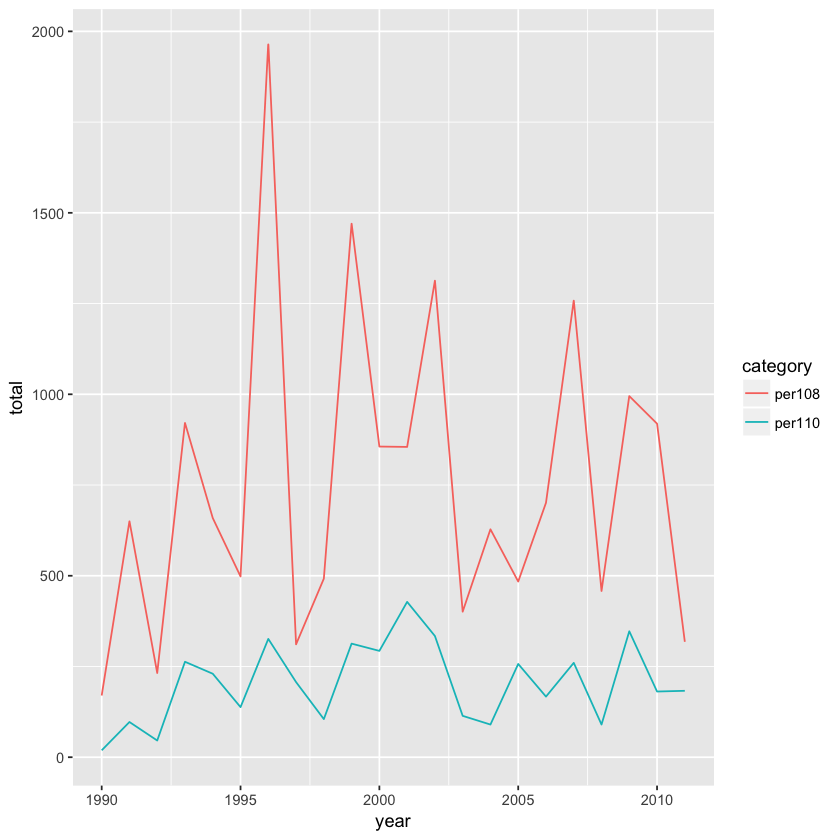

In [34]:
cmpdataLong <- mutate(cmpdataLong, year = floor(date / 100))
cmpdataLong %>% 
    group_by(category, year) %>% 
    summarize(total = sum(catcount)) %>% 
    filter(category %in% c("per108", "per110")) %>% 
    ggplot(aes(x = year, y = total, colour = category, group = category)) + geom_line()